<a href="https://colab.research.google.com/github/Todmount/KHAI_MLcourse/blob/PR6/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика №6
## Проста лінійна регресія. Градієнтний спуск.


In [2]:
# імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

#### Генерування даних для навчання моделі

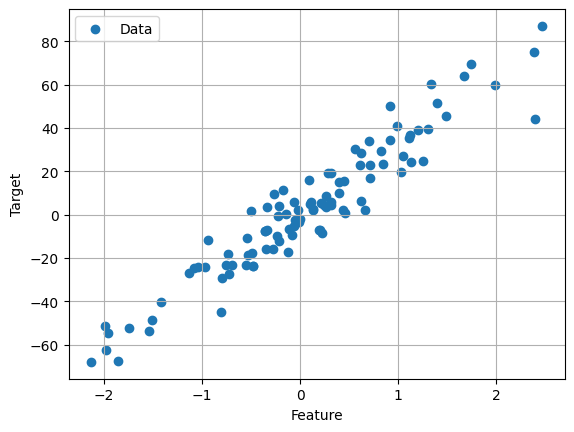

In [3]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1,
                       noise=10, random_state=10)

plt.scatter(X, y, label='Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()

### Функція втрат - середньоквадратична помилка (MSE)

$$MSE = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-\text{y_pred}_i})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-(w_1\cdot X_i + w_0)})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-w_1\cdot X_i - w_0})^2$$



### Градієнт функції середньоквадратичної помилки

Розпишемо градієнт окремо для коефіцієнта зсуву ($\omega_0$) і коефіцієнта нахилу ($\omega_1$).

Коефіцієнт зсуву:
$$\frac{∂ MSE}{∂ w_0} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot (-1)$$

Коефіцієнт нахилу:
$$\frac{∂ MSE}{∂ w_1} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot (-X)$$


#### Завдання

1. Реалізувати функцію втрат тобто функцію $MSE$.
2. Реалізувати функцію розрахунку градієнтів для вищевказаної функції втрат.
3. Реалізувати цикл градієнтного спуску. На початку необхідно ініціалізувати коефіцієнти моделі нулями, потім на кожному кроці рахувати градієнт тобто множити його на крок навчання і віднімати його з попередніх значень коефіцієнтів і так далі поки не зрозуміємо, що точки коефіцієнтів дуже схожі один на одного на сусідніх ітерація. Встановіть мінімальне значення, на яке повинні змінюватися ваги $\epsilon = 0.0001$. Крок навчання $\alpha$ встановіть 0.1.
4. Навчити модель з використанням модулю LinearRegression і порівняти результат.

## Виконання

### Розрахунок коефіцієнтів методом MSE

In [103]:
def grad_func():
    # Параметри градієнтного спуску
    N = len(X)
    n_iteration = 100
    learning_rate = 0.1
    epsilon = 0.0001

    # Функціїї СКМ та градіентів
    def MSE_func():
        return (1 / N) * np.sum(y - w1 * X + w0) ** 2

    def w1_grad():
        return (2 / N) * np.sum((y - y_pred) * (-X[:, 0]))

    def w0_grad():
        return (2 / N) * np.sum((y - y_pred) * (-1))

    # Ініціалізація коефіцієнтів моделі
    w1 = w0 = 0
    nw1 = w1
    nw0 = w0

    # Градіентний спуск
    for i in range(n_iteration):
        cur_w1 = nw1
        cur_w0 = nw0

        y_pred = cur_w1 * X[:, 0] + cur_w0

        nw1 = cur_w1 - learning_rate * w1_grad()
        nw0 = cur_w0 - learning_rate * w0_grad()
        # Виведення інформації про поточну ітерацію
        # print(f"Iteration {i + 1}/{n_iteration}, w0: {w0}, w1: {w1}")
        # Умова зупинки
        if abs(cur_w1 - nw1) <= epsilon and (abs(cur_w0 - nw0) <= epsilon):
            #print("Converged")
            break

    print(f"Final coefficients: ω1 = {cur_w1}, ω0 = {cur_w0}")

### Розрахунок коефіцієнтів за допомогою LinearRegression  

In [75]:
def grad_func_ml():
    model_n = LinearRegression()
    model_n.fit(X, y)
    print(f"sklearn LinearRegression: ω1 = {model_n.coef_[0]}, ω0 = {model_n.intercept_}")

### Вивід результатів

In [104]:
grad_func()
grad_func_ml()

Final coefficients: ω1 = 30.658494511222777, ω0 = 0.5283208331345618
sklearn LinearRegression: ω1 = 30.65896337397858, ω0 = 0.5280415108758181
